# Data Cleaning

Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Loading in the data

In [2]:
df = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')
print(df.shape)
df.head()

(4572257, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bitcoin_df = df.copy() # making a copy of the dataset to work with

In [4]:
time_col = pd.to_datetime(bitcoin_df['Timestamp'], unit='s') # converting the 'Timestamp' column to 
                                                             # datetime object

bitcoin_df.drop('Timestamp', axis=1, inplace=True) # drops the 'Timestamp' column
bitcoin_df['Timestamp'] = time_col # creates a new 'Timestamp' column with datetime dtype
bitcoin_df.set_index('Timestamp', inplace=True) # makes 'Timestamp' the index

bitcoin_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
missing_val_mask = bitcoin_df.isnull() # creating a dataframe with boolean values indicating the presence of 
                                       # missing value
missing_val_mask.sum()

Open                 1241716
High                 1241716
Low                  1241716
Close                1241716
Volume_(BTC)         1241716
Volume_(Currency)    1241716
Weighted_Price       1241716
dtype: int64

Let's check if all columns have Nan values for each row with any Nan value. 

In [6]:
missing_val_mask.sum(axis=1).sum() == len(bitcoin_df.columns) * missing_val_mask.sum().loc['Open']

True

Confirmed!

In [7]:
n_missing_val = missing_val_mask.sum().loc['Open'] # number of rows with missing values
print('There are {} rows with missing values which make up {}% of the total number of rows'.format( \
                                            n_missing_val, round(100*n_missing_val / bitcoin_df.shape[0], 3)))

There are 1241716 rows with missing values which make up 27.158% of the total number of rows


In [8]:
# creating a dataframe that contains only rows with missing values
missing_val_df = bitcoin_df[missing_val_mask.sum(axis=1) == 7].copy()

# asserting that the number of rows in 'missing_val_df' is same as the number of rows with missing values in 'df'
assert missing_val_df.shape[0] == n_missing_val 

In [9]:
# creating a 'date' column that contains only the date
missing_val_df['date'] = pd.Series(missing_val_df.index).apply(lambda x: x.date()).values
missing_val_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
Timestamp,,,,,,,,
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31


Let's check the duration of Nan values per day in minutes

In [10]:
daily_Nan_minute = missing_val_df.groupby('date').apply(lambda x: x.shape[0])

In [11]:
assert daily_Nan_minute.sum() == n_missing_val

In [12]:
daily_Nan_minute.tail()

date
2020-09-09     7
2020-09-10     4
2020-09-11     7
2020-09-12    10
2020-09-13    25
dtype: int64

In [13]:
print('a day has {} minutes'.format(60*24))
print('maximum duration of Nan values in minute is {}mins which is {}% of the day'.format( \
                daily_Nan_minute.max(), round(100*daily_Nan_minute.max() / (60*24), 3)))
print('minimum duration of Nan values in minute is {}mins which is {}% of the day'.format( \
                daily_Nan_minute.min(), round(100*daily_Nan_minute.min() / (60*24), 3)))

a day has 1440 minutes
maximum duration of Nan values in minute is 1439mins which is 99.931% of the day
minimum duration of Nan values in minute is 1mins which is 0.069% of the day


In [14]:
missing_val_df.tail(1) # checking the last time with Nan value

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
Timestamp,,,,,,,,
2020-09-13 13:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-13


In [15]:
print('1st quartile of timestamp with Nan value is {}'.format(missing_val_df.index[len(missing_val_df)//4]))
print('median of timestamp with Nan value is {}'.format(missing_val_df.index[len(missing_val_df)//2]))
print('3rd quartile of timestamp with Nan value is {}'.format(missing_val_df.index[3*(len(missing_val_df)//4)]))

1st quartile of timestamp with Nan value is 2012-08-08 22:52:00
median of timestamp with Nan value is 2013-05-18 14:39:00
3rd quartile of timestamp with Nan value is 2015-08-23 20:01:00


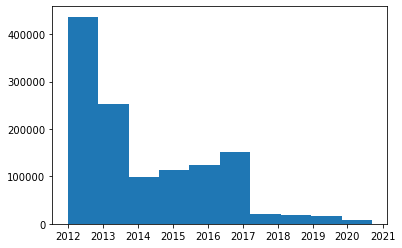

In [16]:
hist = plt.hist(missing_val_df.index) # checking the distribution of the Nan values

So we see that the Nan values are skewed to the left. Nan values are heavily present in past years than earlier years.

### Let's see the reason for the missing values as stated by Zielak the provider of the dataset so we know how to handle them.

> *CSV files for select bitcoin exchanges for the time period of Jan 2012 to September 2020, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time. **TIMESTAMPS WITHOUT ANY TRADES OR ACTIVITY HAVE THEIR DATA FIELDS FILLED WITH NANS**...*

### Zielak also told us about jumps in timestamps and here is the reason:
> ***...IF A TIMESTAMP IS MISSING, OR IF THERE ARE JUMPS, THIS MAY BE BECAUSE THE EXCHANGE (OR ITS API) WAS DOWN, THE EXCHANGE (OR ITS API) DID NOT EXIST, OR SOME OTHER UNFORESEEN TECHNICAL ERROR IN THE DATA REPORTING OR GATHERING***. *All effort has been made to deduplicate entries and verify the contents are correct and complete to the best of my ability, but obviously trust at your own risk.*

So, let's check for time jumps and contraction. Jump if any of the sampling rate is greater than a minute and contraction if it is less than a minute.

In [17]:
bitcoin_df['time_col'] = bitcoin_df.index
# taking the first order difference to get the duration of Nan values

time_jump = (bitcoin_df['time_col'] - bitcoin_df['time_col'].shift()).dropna() 
delta_time = time_jump.apply(lambda x: x.total_seconds()) # converts the duration to seconds

delta_time.head()

Timestamp
2011-12-31 07:53:00    60.0
2011-12-31 07:54:00    60.0
2011-12-31 07:55:00    60.0
2011-12-31 07:56:00    60.0
2011-12-31 07:57:00    60.0
Name: time_col, dtype: float64

In [18]:
assert delta_time.shape[0] + 1 == bitcoin_df.shape[0] # confirming the number of rows

In [19]:
print('There is {} time jump'.format((delta_time > 60).sum()))
print('There is {} time contraction'.format((delta_time < 60).sum()))

There is 1 time jump
There is 0 time contraction


So there is no time contraction, let's now find where exactly the time jump is.

In [20]:
jump_duration = delta_time[delta_time > 60].values[0]
print('time jump duration is {} days'.format(round(jump_duration/(3600*24), 3)))

time jump duration is 4.495 days


In [21]:
ind_of_time_jump = delta_time.index.get_loc(delta_time[delta_time > 60].index[0])
bitcoin_df.iloc[ind_of_time_jump: ind_of_time_jump+2]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2015-01-05 09:12:00,276.80,276.8,276.80,276.8,0.100000,27.680000,276.800000,2015-01-05 09:12:00
2015-01-09 21:05:00,272.45,305.0,272.45,291.1,175.837078,50502.066285,287.209426,2015-01-09 21:05:00


In [22]:
num_of_timestamp_jumps =24*60*4 + 30
num_of_timestamp_jumps

5790

Although, there are more than one reasons for jumps in 'Timestamps' as stated by Zielak, one of worth noting is that "it may be the exchange or its API was down or didn't exist. A jump of approximately 4.5 days was observed which is 5,790mins (5,790 jumps). This jump is huge and we can conclude that it may not be due to error in data gathering rather, it may be due to a downtime in API or exchanges that don't exist. This is a strong reasoning and we will decide to **NOT** impute the jumps in time because we may be too biased if we impute such a great jump.

Resampling and smoothing before feeding the dataset to a model would cater for the effect of the jumps as a result, we wouldn't sample on a daily time frame and below.

Let's check if there is any duplicate in 'Timestamp' values

In [23]:
len(bitcoin_df['time_col'].unique()) == bitcoin_df.shape[0]

True

So, we conclude that there are no duplicates in 'Timestamp' values!

Let's check the total span of the dataset.

In [24]:
print('the dataset spans for {}'.format(bitcoin_df.index[-1] - bitcoin_df.index[0]))

the dataset spans for 3179 days 16:08:00


Let's now go back to the Nan values. this time, we will be handling them. since the cause of missingness is "No trading activity", it will be biased to use imputation methods like EMA or filling with a particular value since there was no trading activity in real sense.

There are two best ways to handle missing values of this nature:
1. By filling 'Volume_(BTC)', 'Volume_(Currency)', and 'Weighted_Price' columns with zeros since there was no trading activity. Then, we do forward fill for 'Close' column and fill 'Open', 'High', and 'Low' columns with the values of the 'Close' column to make it a constant (horizontal) line of that peroid of inactivity.
2. Dropping the rows with Nan values because in actual sense, there was no trade for those periods.

WE WILL BE USING THE FIRST APPROACH TO BUILD OUR MODEL

### Imputation

In [25]:
bitcoin_df_imputed = bitcoin_df.copy() # makes a copy of 'bitcoin_df'. 

bitcoin_df_imputed['Close'].fillna(method='ffill', inplace=True) # forward fill for the 'Close' column

# imputing 'Volume_(BTC)', 'Volume_(Currency)', and 'Weighted_Price' with zeros
bitcoin_df_imputed[['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']] = \
bitcoin_df_imputed[['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']].fillna(0)
bitcoin_df_imputed.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
2011-12-31 07:53:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:53:00
2011-12-31 07:54:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:54:00
2011-12-31 07:55:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:55:00
2011-12-31 07:56:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:56:00


In [26]:
# copying the values of 'Close' column to three columns of 'Open', 'High', and 'Low' that would later 
#be used for imputation.
impute_df = pd.DataFrame({'Open': bitcoin_df_imputed['Close'], 'High': bitcoin_df_imputed['Close'], \
                          'Low': bitcoin_df_imputed['Close']})
impute_df.head()

,Open,High,Low
Timestamp,,,
2011-12-31 07:52:00,4.39,4.39,4.39
2011-12-31 07:53:00,4.39,4.39,4.39
2011-12-31 07:54:00,4.39,4.39,4.39
2011-12-31 07:55:00,4.39,4.39,4.39
2011-12-31 07:56:00,4.39,4.39,4.39


In [27]:
# imputation
bitcoin_df_imputed[['Open', 'High', 'Low']] = bitcoin_df_imputed[['Open', 'High', 'Low']].fillna( \
                                                            impute_df)
bitcoin_df_imputed.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:53:00
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:54:00
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:55:00
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:56:00


In [28]:
print(bitcoin_df_imputed.shape)
bitcoin_df_imputed.isnull().sum()

(4572257, 8)


Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
time_col             0
dtype: int64

The 'Weighted_Price' column of 'df' doesn't have any value of zero, we will use this to further confirm that our imputation was done properly. 

In [29]:
(df['Weighted_Price'] == 0).sum() # checks the number of zero values in 'Weighted_Price' column of 'df'

0

In [30]:
assert (bitcoin_df_imputed['Weighted_Price'] == 0).sum() == missing_val_mask['Open'].sum()

In [31]:
# making a list of all columns apart from 'time_col' column and'Open' column
cols = list(bitcoin_df_imputed.columns[1:-1])

# creating the appropriate subplot indices for the cols to be used for making plots
ind = list(range(3, 9))

Let's create a function that would plot the cols and 'Open' with 'Timestamp' for a given dataframe

In [32]:
def plot_series_of_each_column(d_f, cols=cols):
    fig = plt.figure(figsize=(18, 12))
    for i, col in zip(ind, cols):
        a = fig.add_subplot(4, 2, i)
        plt.xlabel('year')
        plt.ylabel(col)
        plt.plot(d_f.index, d_f[col], '-')
        plt.grid()
    
    a = fig.add_subplot(4, 1, 1)
    plt.xlabel('year')
    plt.ylabel('Open')
    plt.plot(d_f.index, d_f['Open'], '-')
    plt.grid()

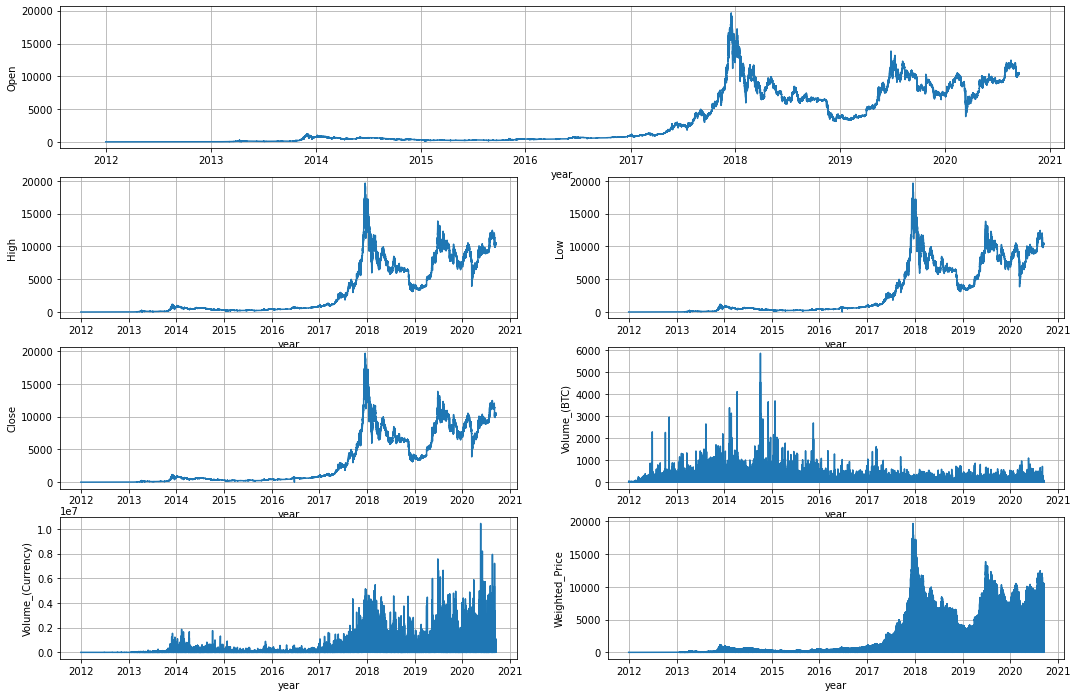

In [33]:
plot_series_of_each_column(bitcoin_df_imputed)

# Resampling

### resampling to a daily time frame

In [34]:
daily_Open = bitcoin_df_imputed['Open'].resample('D').first()
daily_High = bitcoin_df_imputed['High'].resample('D').max()
daily_Low = bitcoin_df_imputed['Low'].resample('D').min()
daily_Close = bitcoin_df_imputed['Close'].resample('D').last()
daily_Volume_BTC = bitcoin_df_imputed['Volume_(BTC)'].resample('D').sum()
daily_Volume_Currency = bitcoin_df_imputed['Volume_(Currency)'].resample('D').sum()

In [35]:
daily_df = pd.DataFrame({'Open': daily_Open, 'High': daily_High, 'Low': daily_Low, 'Close': daily_Close, \
                         'Volume_(BTC)': daily_Volume_BTC, 'Volume_(Currency)': daily_Volume_Currency})
daily_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878,425.320338
2012-01-01,4.58,5.00,4.58,5.00,21.602000,105.779160
2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000
2012-01-03,5.00,5.32,5.00,5.29,88.037281,464.805210
2012-01-04,5.29,5.57,4.93,5.57,107.233260,568.076197


### checking fo Nan values

In [36]:
daily_df.isnull().sum()

Open                 3
High                 3
Low                  3
Close                3
Volume_(BTC)         0
Volume_(Currency)    0
dtype: int64

In [37]:
daily_df[daily_df.isnull().sum(axis=1) == 4] # pulling out the Nan values

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2015-01-06,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-07,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-08,NaN,NaN,NaN,NaN,0.0,0.0


In [38]:
daily_df[daily_df[['Volume_(BTC)', 'Volume_(Currency)']].sum(axis=1) == 0] # pulling out rows where 'Volume(BTC)' 
                                                                           # and Volume(Currency)'s values are 0

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2015-01-06,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-07,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-08,NaN,NaN,NaN,NaN,0.0,0.0


### it appeared that 'Volume(BTC) and Volume(Currency)'s values are zero where the other columns have Nan values

In [39]:
daily_df_imputed = daily_df.copy() # makes a copy of 'bitcoin_df'. 

daily_df_imputed['Close'].fillna(method='ffill', inplace=True) # forward fill for the 'Close' column

# copying the values of 'Close' column to three columns of 'Open', 'High', and 'Low' that would later 
#be used for imputation.
daily_impute = pd.DataFrame({'Open': daily_df_imputed['Close'], 'High': daily_df_imputed['Close'], \
                          'Low': daily_df_imputed['Close']})
daily_impute.head()


,Open,High,Low
Timestamp,,,
2011-12-31,4.58,4.58,4.58
2012-01-01,5.00,5.00,5.00
2012-01-02,5.00,5.00,5.00
2012-01-03,5.29,5.29,5.29
2012-01-04,5.57,5.57,5.57


In [40]:
# imputation
daily_df_imputed[['Open', 'High', 'Low']] = daily_df_imputed[['Open', 'High', 'Low']].fillna( \
                                                            daily_impute)
daily_df_imputed.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878,425.320338
2012-01-01,4.58,5.00,4.58,5.00,21.602000,105.779160
2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000
2012-01-03,5.00,5.32,5.00,5.29,88.037281,464.805210
2012-01-04,5.29,5.57,4.93,5.57,107.233260,568.076197


In [41]:
daily_df_imputed.isnull().sum() # checks for Nan values after imputing

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
dtype: int64

In [42]:
daily_df_imputed.loc['2015-01-05': '2015-01-09'] # checks for values before and after where 'Volume(BTC)' and 
                                                # Volume(Currency)'s values are 0 to see if there will be shock

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2015-01-05,264.55,280.0,264.07,276.80,9528.271002,2.596898e+06
2015-01-06,276.80,276.8,276.80,276.80,0.000000,0.000000e+00
2015-01-07,276.80,276.8,276.80,276.80,0.000000,0.000000e+00
2015-01-08,276.80,276.8,276.80,276.80,0.000000,0.000000e+00
2015-01-09,272.45,305.0,272.45,293.97,9914.249594,2.898085e+06


In [43]:
assert daily_df_imputed.isnull().sum().sum() == 0

In [44]:
print('bitcoin_df_imputed has been downsampled from a minute timeframe of {}'.format(bitcoin_df_imputed.shape[0])\
      + ' observations to a daily timeframe of {} observations'.format(daily_df_imputed.shape[0]))

bitcoin_df_imputed has been downsampled from a minute timeframe of 4572257 observations to a daily timeframe of 3181 observations


### Plots of the 6 time series

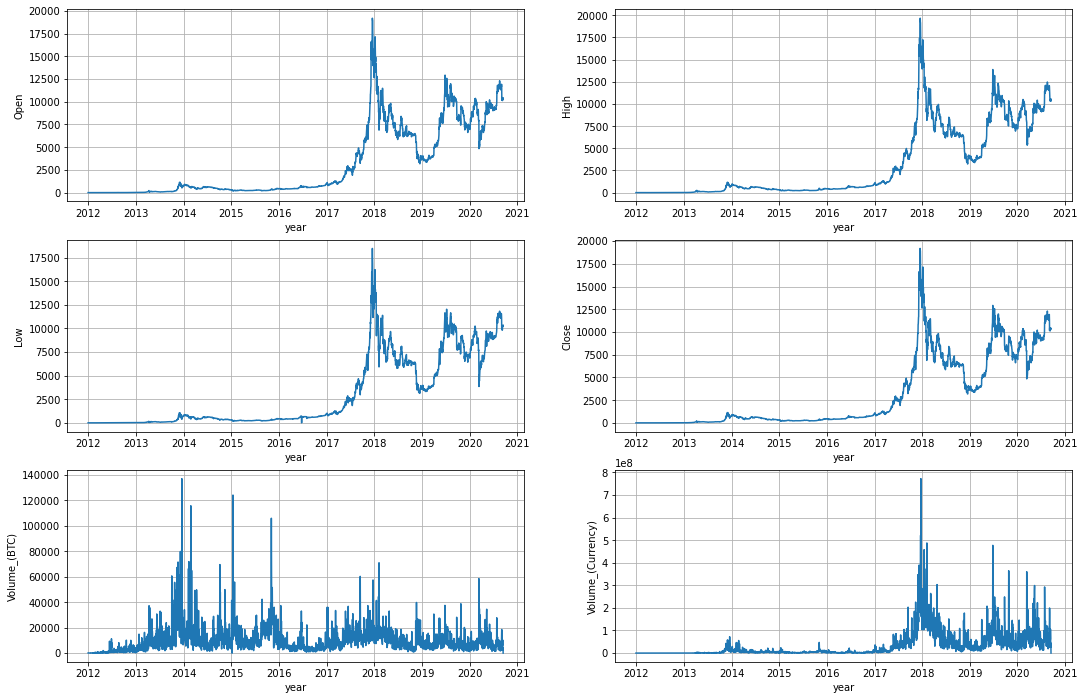

In [45]:
cols = list(daily_df.columns)
fig = plt.figure(figsize=(18, 12))
for i, col in zip(range(1, len(cols)+1), cols):
    a = fig.add_subplot(3, 2, i)
    plt.xlabel('year')
    plt.ylabel(col)
    plt.plot(daily_df.index, daily_df[col], '-')
    plt.grid()

### It seems 'Volume(BTC)' and Volume(Currency) needs smoothing or further resampling because they seem to be noisy. So, let's further down sample them to a weekly time frame.

In [46]:
weekly_Volume_BTC = bitcoin_df_imputed['Volume_(BTC)'].resample('W').sum()
weekly_Volume_Currency = bitcoin_df_imputed['Volume_(Currency)'].resample('W').sum()

In [47]:
weekly_Volume_BTC.tail(1) # checks the last week in the data set

Timestamp
2020-09-20    1.292006
Freq: W-SUN, Name: Volume_(BTC), dtype: float64

In [48]:
# creating a dictionary of the weekly 'Volume(BTC)' and Volume(Currency) series
weekly_btc_cur = {'Volume(BTC)': weekly_Volume_BTC, 'Volume(Currency)': weekly_Volume_Currency} 

# defining a function to plot the values or columns of either a dictionary or dataframe that has 2 values or 
                                            # columns as the case may be
def one_by_two_plot(df_or_dict):
    fig = plt.figure(figsize=(18, 6))
    for i, col in zip(range(1, 3), df_or_dict):
        a = fig.add_subplot(1, 2, i)
        plt.xlabel('year')
        plt.ylabel(col)
        plt.plot(df_or_dict[col].index, df_or_dict[col], '-')
        plt.grid()

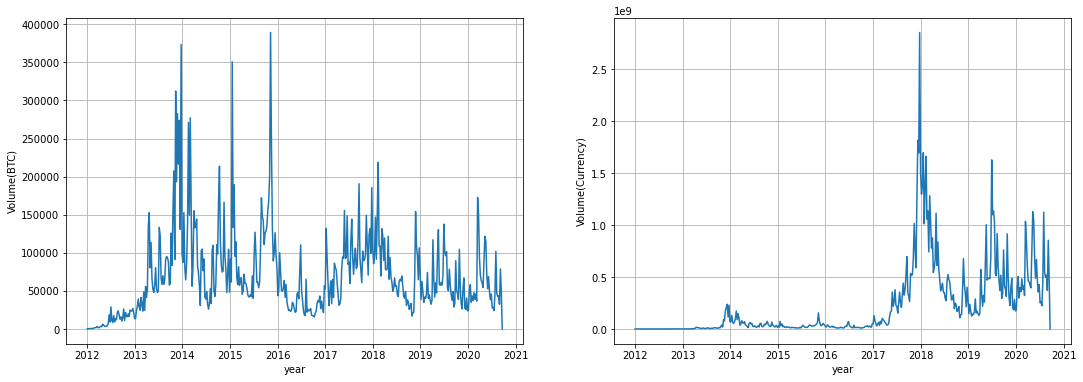

In [49]:
one_by_two_plot(weekly_btc_cur) # plots the weekly resampled 'Volume(BTC)' and Volume(Currency) series

### let's check if the weekly resampled 'Volume(BTC)' and Volume(Currency) have zeros in them

In [50]:
for series in weekly_btc_cur:
    if weekly_btc_cur[series][weekly_btc_cur[series] == 0].sum():
        print(series, ' has zeros in it')
    else:
        print(series, ' has no zeros in it')
    print()

Volume(BTC)  has no zeros in it

Volume(Currency)  has no zeros in it



In [51]:
weekly_btc_cur_df = pd.DataFrame(weekly_btc_cur) # making a dataframe of the weekly 'Volume(BTC)' and 
                                                 # Volume(Currency) series
print(weekly_btc_cur_df.shape)
weekly_btc_cur_df.head()

(456, 2)


,Volume(BTC),Volume(Currency)
Timestamp,,
2012-01-01,116.919878,531.099498
2012-01-08,348.298975,1975.273227
2012-01-15,399.325314,2770.146205
2012-01-22,731.836776,4604.180537
2012-01-29,393.194037,2430.908655


In [52]:
weekly_btc_cur_df.tail(3) # checking the last three weeks. We see that the because the actual dataset ends 
        # 2020-09-14, the last week will have one value in it and this will resukt to a shock

,Volume(BTC),Volume(Currency)
Timestamp,,
2020-09-06,78807.929519,8.536763e+08
2020-09-13,47461.465280,4.852597e+08
2020-09-20,1.292006,1.334957e+04


In [53]:
# we will do away with the last week due to the shock
weekly_btc_cur_df = weekly_btc_cur_df.iloc[:-1].copy()
weekly_btc_cur_df.tail(1)

,Volume(BTC),Volume(Currency)
Timestamp,,
2020-09-13,47461.46528,4.852597e+08


## Test for stationarity using the ADF TEST

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
# defining a function to print out adf results
def print_adf_results(df):
    for col in df:
        adf_result = adfuller(df[col])
        print('For {}:'.format(col))
        print('-'*40)
        print('ADF statistics: {}'.format(adf_result[0]))
        print('p-value: {}'.format(adf_result[1]))
        print('No of lags used: {}'.format(adf_result[2]))
        print('No of observations used: {}'.format(adf_result[3]))
        print('critical values: ')
        for k, v in adf_result[4].items():
            print('{}: {}'.format(k, v))
        print()

In [56]:
print_adf_results(daily_df_imputed)

For Open:
----------------------------------------
ADF statistics: -1.284801257930683
p-value: 0.636096754787308
No of lags used: 29
No of observations used: 3151
critical values: 
1%: -3.432427002601706
5%: -2.8624576920765237
10%: -2.5672585088743345

For High:
----------------------------------------
ADF statistics: -1.3816953742338463
p-value: 0.5910194493273242
No of lags used: 28
No of observations used: 3152
critical values: 
1%: -3.4324263431163704
5%: -2.8624574007945007
10%: -2.567258353800826

For Low:
----------------------------------------
ADF statistics: -1.3262628216998742
p-value: 0.6170730489045787
No of lags used: 27
No of observations used: 3153
critical values: 
1%: -3.4324256840496985
5%: -2.8624571096973295
10%: -2.5672581988257397

For Close:
----------------------------------------
ADF statistics: -1.3030044342990987
p-value: 0.6277966627996805
No of lags used: 29
No of observations used: 3151
critical values: 
1%: -3.432427002601706
5%: -2.8624576920765237
10%

### from the results, we see that daily OHLC are not stationary

In [57]:
print_adf_results(weekly_btc_cur_df)

For Volume(BTC):
----------------------------------------
ADF statistics: -4.208518696642703
p-value: 0.000637360837495269
No of lags used: 5
No of observations used: 449
critical values: 
1%: -3.4449982835447894
5%: -2.8679986379826814
10%: -2.5702102140862397

For Volume(Currency):
----------------------------------------
ADF statistics: -2.4862769027349367
p-value: 0.11884910653877573
No of lags used: 15
No of observations used: 439
critical values: 
1%: -3.4453339386510784
5%: -2.868146269723016
10%: -2.5702889034926137



### from the results, we see that weekly_btc is stationary while weekly currency is not

In [58]:
daily_df_imputed.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878,425.320338
2012-01-01,4.58,5.00,4.58,5.00,21.602000,105.779160
2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000
2012-01-03,5.00,5.32,5.00,5.29,88.037281,464.805210
2012-01-04,5.29,5.57,4.93,5.57,107.233260,568.076197


In [59]:
daily_OHLC = daily_df_imputed.iloc[:, :-2].copy() # since we now have a dataframe for weekly Volume_(BTC) 
                            # Volume_(Currency), we will use a daily time frame for the rest series. Here, we
                            # make a dataframe of the remaining 4 series

In [60]:
print_adf_results(np.log(daily_OHLC)) # checks if the log transform of OHLC is stationary

For Open:
----------------------------------------
ADF statistics: -1.7210856989843304
p-value: 0.42028253984826924
No of lags used: 23
No of observations used: 3157
critical values: 
1%: -3.4324230519616883
5%: -2.862455947153645
10%: -2.5672575799077504

For High:
----------------------------------------
ADF statistics: -1.7959718732379597
p-value: 0.3824633727004588
No of lags used: 24
No of observations used: 3156
critical values: 
1%: -3.4324237093576846
5%: -2.862456237513167
10%: -2.5672577344900813

For Low:
----------------------------------------
ADF statistics: -1.805404125141333
p-value: 0.37778201548948265
No of lags used: 10
No of observations used: 3170
critical values: 
1%: -3.432414543587629
5%: -2.8624521891581085
10%: -2.5672555792176257

For Close:
----------------------------------------
ADF statistics: -1.785371635378861
p-value: 0.3877480732448457
No of lags used: 17
No of observations used: 3163
critical values: 
1%: -3.4324191163220705
5%: -2.862454208853862
10

### from the results, we see that the log transform of OHLC is not stationary also

In [61]:
print_adf_results(np.log(weekly_btc_cur_df)) # checks if the log transform of btc and currency is stationary

For Volume(BTC):
----------------------------------------
ADF statistics: -5.325247962253853
p-value: 4.853373646402095e-06
No of lags used: 6
No of observations used: 448
critical values: 
1%: -3.4450311708077743
5%: -2.8680131035505023
10%: -2.570217924306441

For Volume(Currency):
----------------------------------------
ADF statistics: -3.634853109865286
p-value: 0.005128623865909884
No of lags used: 4
No of observations used: 450
critical values: 
1%: -3.444965543297668
5%: -2.8679842369272976
10%: -2.5702025382716047



### After log transform, currency now seem to be stationary, btc has always been stationary

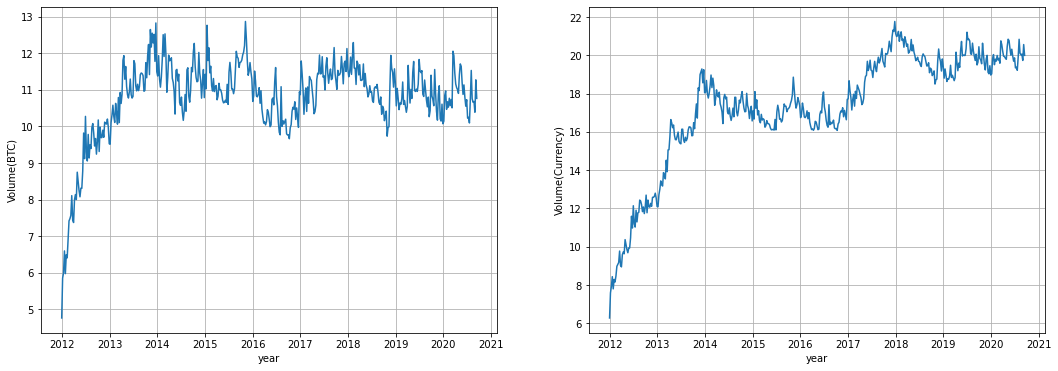

In [62]:
one_by_two_plot(np.log(weekly_btc_cur_df)) # checks the plot of the seemimgly stationary btc and currency

### Although, from their adf results, they are stationary but their plots shows that they are not

## Cointegration Test

In [63]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [64]:
# defining a function that will print out cointegration results
def get_coint_results(df, det_order=-1, k_ar_diff=1, summarize=True):
    cj = coint_johansen(df, det_order, k_ar_diff)
    
    results = {'Trace_stat': cj.lr1, 'Critical_trace_stat': cj.trace_stat_crit_vals, \
               'Max_eigen_stat': cj.lr2, 'Critical_max_eigen_stat': cj.max_eig_stat_crit_vals, \
               'eigen_values': cj.eig}
    
    if summarize:
        for res in results:
            print(res)
            print('-'*35)
            print(results[res])
            print()
            
    return cj

Here is a [link](https://en.wikipedia.org/wiki/Vector_autoregression) to know more about cointegration

In [65]:
coint_result_OHLC = get_coint_results(daily_OHLC) # gets cointegration results of OHLC

Trace_stat
-----------------------------------
[3.76427392e+03 1.63780707e+03 3.96074587e+02 2.67885133e-01]

Critical_trace_stat
-----------------------------------
[[37.0339 40.1749 46.5716]
 [21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]

Max_eigen_stat
-----------------------------------
[2.12646686e+03 1.24173248e+03 3.95806702e+02 2.67885133e-01]

Critical_max_eigen_stat
-----------------------------------
[[21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]

eigen_values
-----------------------------------
[4.87733672e-01 3.23352447e-01 1.17067627e-01 8.42635566e-05]



### from the results, we see that OHLC are not cointegrating even to a threshold of 90%

In [66]:
coint_result_OHLC = get_coint_results(np.log(daily_OHLC)) # checks if the log transform of OHLC are cointegrating

Trace_stat
-----------------------------------
[3776.59487567 1662.93114182  373.92461681    4.65457217]

Critical_trace_stat
-----------------------------------
[[37.0339 40.1749 46.5716]
 [21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]

Max_eigen_stat
-----------------------------------
[2113.66373385 1289.00652501  369.27004464    4.65457217]

Critical_max_eigen_stat
-----------------------------------
[[21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]

eigen_values
-----------------------------------
[0.48566641 0.33334024 0.10966651 0.00146309]



### from the results, we see that OHLC are cointegrating more than a threshold of 95%. So, there exist at least 4 cointegrating vectors(eigen vectors) when operated on the non-stationary OHLC, will make them stationary. Let's check them out!

In [67]:
# operating the non-stationary OHLC on the eigen vectors
stationary_OHLC = np.matmul(np.array(np.log(daily_OHLC)), coint_result_OHLC.evec[:, 0].reshape(-1, 1))

Text(0, 0.5, 'Co-integrated OHLC')

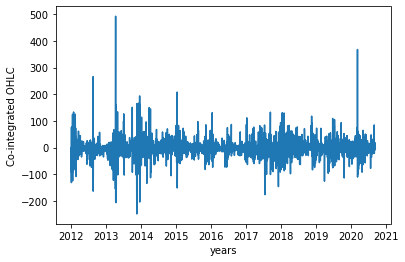

In [68]:
plt.plot(daily_OHLC.index, stationary_OHLC) # checks the plots of after the operation in the eigen vectors
plt.xlabel('years')
plt.ylabel('Co-integrated OHLC')

### from the plot, we see that that although the log of OHLC themselves aren't stationary, they will become stationary after operation on the eigen vectors. Let's further confirm this by seeing the results of ADF

In [69]:
print_adf_results(pd.DataFrame({'OHLC': stationary_OHLC.flatten()}, index=daily_df_imputed.index))

For OHLC:
----------------------------------------
ADF statistics: -10.050617068872985
p-value: 1.415793028332456e-17
No of lags used: 23
No of observations used: 3157
critical values: 
1%: -3.4324230519616883
5%: -2.862455947153645
10%: -2.5672575799077504



### we now see that after operating the log of OHLC on the eigen vectors, they are will become stationary. We conclude that the log of OHLC are indeed cointegrated. We won't conduct cointegration test for the weekly btc and currency because they didn't meet the pre-requisite of cointegration. Btc according to ADF test is I(0) while Currency currency is I(0) after taking log transform. So, we proceed to applying differencing on the log of btc and currency.

In [70]:

diff_weekly_btc_cur_df = np.log(weekly_btc_cur_df).diff().dropna()
diff_weekly_btc_cur_df.head()

,Volume(BTC),Volume(Currency)
Timestamp,,
2012-01-08,1.091572,1.313513
2012-01-15,0.136715,0.338193
2012-01-22,0.605781,0.508065
2012-01-29,-0.621254,-0.638700
2012-02-05,0.517574,0.491770


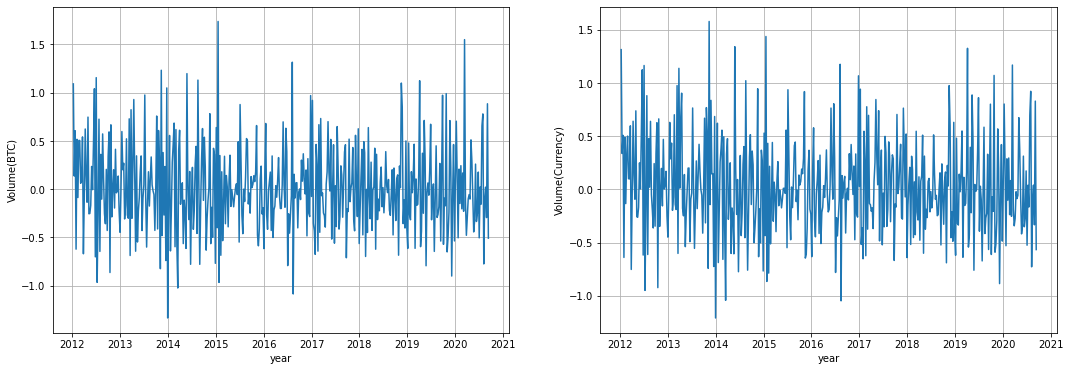

In [71]:
one_by_two_plot(diff_weekly_btc_cur_df) # checks the plots after log transform and differncing btc and currency

### we see that after log transform and differncing btc and currency, they seem to be stationary. We will further confirm with ADF test.

In [72]:
print_adf_results(diff_weekly_btc_cur_df)

For Volume(BTC):
----------------------------------------
ADF statistics: -12.23681859952943
p-value: 1.0236651091327821e-22
No of lags used: 5
No of observations used: 448
critical values: 
1%: -3.4450311708077743
5%: -2.8680131035505023
10%: -2.570217924306441

For Volume(Currency):
----------------------------------------
ADF statistics: -13.501589526419025
p-value: 2.9697395399334575e-25
No of lags used: 3
No of observations used: 450
critical values: 
1%: -3.444965543297668
5%: -2.8679842369272976
10%: -2.5702025382716047



### we see that after log transform and differncing btc and currency, they are indeed stationary. 

In [73]:
# importing useful libraries
from statsmodels.tsa.vector_ar.var_model import VAR

In [74]:
daily_BTC_Currency = daily_df_imputed.iloc[:, -2:].copy()
daily_BTC_Currency.head()

,Volume_(BTC),Volume_(Currency)
Timestamp,,
2011-12-31,95.317878,425.320338
2012-01-01,21.602000,105.779160
2012-01-02,19.048000,95.240000
2012-01-03,88.037281,464.805210
2012-01-04,107.233260,568.076197


In [75]:
# creating a time series split function
def ts_train_test_split(df, start_walk):
    train, test = df[df.index < start_walk], df[df.index >= start_walk]
    return train, test

In [76]:
start_walk_daily = daily_df_imputed.index[-108] # we will be making our test set 108 for daily time frame. This
                                                # mimics 14th september 2020 to 31st december 2020.
start_walk_weekly = diff_weekly_btc_cur_df.index[-15] # we will be making our test set 14 for weekly time frame. 
                                            # This mimics 14th september 2020 to 31st december 2020.

In [77]:
diff_weekly_btc_cur_df.tail(1)

,Volume(BTC),Volume(Currency)
Timestamp,,
2020-09-13,-0.507095,-0.564868


In [78]:
# splitting OHLC and BTC/CURRENCY into train and test set
OHLC_train, OHLC_test = ts_train_test_split(np.log(daily_OHLC), start_walk_daily)
BTC_CUR_train, BTC_CUR_test = ts_train_test_split(diff_weekly_btc_cur_df, start_walk_weekly)

In [79]:
model_ohlc = VAR(OHLC_train) # initializes VAR object
model_ohlc.select_order(maxlags=30).summary() # gets the summary

,AIC,BIC,FPE,HQIC
0,-16.01,-16.00,1.114e-07,-16.01
1,-31.14,-31.10,2.989e-14,-31.13
2,-31.20,-31.13*,2.809e-14,-31.18
3,-31.22,-31.12,2.753e-14,-31.19
4,-31.24,-31.11,2.708e-14,-31.19
5,-31.26,-31.09,2.660e-14,-31.20
6,-31.27,-31.07,2.635e-14,-31.20
7,-31.29,-31.06,2.582e-14,-31.21
8,-31.30,-31.04,2.540e-14,-31.21
9,-31.31,-31.02,2.527e-14,-31.20


### from the AIC score, the best lag order to use for OHLC is 16

In [80]:
model_btc_cur = VAR(BTC_CUR_train) # initializes VAR object
model_btc_cur.select_order(maxlags=12).summary() # gets the summary

,AIC,BIC,FPE,HQIC
0,-6.118,-6.099,0.002202,-6.111
1,-6.291,-6.234*,0.001853,-6.269
2,-6.316,-6.221,0.001806,-6.279*
3,-6.309,-6.176,0.001820,-6.256
4,-6.317,-6.146,0.001806,-6.249
5,-6.328*,-6.119,0.001786*,-6.245
6,-6.324,-6.077,0.001793,-6.226
7,-6.319,-6.034,0.001802,-6.206
8,-6.309,-5.986,0.001820,-6.181
9,-6.300,-5.939,0.001837,-6.157


### from the AIC score, the best lag order to use for BTC/CURRENCY is 5

In [81]:
# creating a walk forward fuction that will split a time series into training and testing, and return a tuple of
# the test set and the predicited test set
def walk_forward_VAR(df, start_walk, lag_order):
    
    train, test = ts_train_test_split(df, start_walk)
        
    history = [list(x) for x in np.array(train)]
    forecasts = []
    
    for t in range(test.shape[0]):
        model = VAR(np.array(history))                
        model_fit = model.fit(lag_order)
        yhat = model_fit.forecast(model.y, steps=1)
        forecasts.append(list(yhat[0]))
        history.append(list(np.array(test)[t]))
                      
    return test, pd.DataFrame(np.array(forecasts), index=test.index)

In [82]:
BTC_CUR_VAR_results = walk_forward_VAR(diff_weekly_btc_cur_df, start_walk_weekly, 5) # BTC/CUR walk forward

In [83]:
# OHLC walk forward
OHLC_VAR_results_test, OHLC_VAR_results_pred = walk_forward_VAR(np.log(daily_OHLC), start_walk_daily, 16)
OHLC_VAR_results = np.exp(OHLC_VAR_results_test), np.exp(OHLC_VAR_results_pred)

In [84]:
# defining a fuction for inversing differencing
def inv_diff(df, df_diff):
    index = df.index
    cols = df.columns
    df = df.iloc[0]
    arr = np.array([list(df)] + [list(row) for row in np.array(df_diff)])
    return pd.DataFrame(np.cumsum(arr, axis=0), index=index, columns=cols)

In [85]:
print(BTC_CUR_train.shape)
print(BTC_CUR_test.shape)
BTC_CUR_train.head()

(439, 2)
(15, 2)


,Volume(BTC),Volume(Currency)
Timestamp,,
2012-01-08,1.091572,1.313513
2012-01-15,0.136715,0.338193
2012-01-22,0.605781,0.508065
2012-01-29,-0.621254,-0.638700
2012-02-05,0.517574,0.491770


In [86]:
# renaming the columns of the predicted BTC/CUR tests set
BTC_CUR_result1 = BTC_CUR_VAR_results[1].rename(columns={0: 'Volume(BTC)', 1: 'Volume(Currency)'})
BTC_CUR_result1.head()

,Volume(BTC),Volume(Currency)
Timestamp,,
2020-06-07,0.160128,0.169984
2020-06-14,0.087663,0.112433
2020-06-21,0.221284,0.227846
2020-06-28,0.259601,0.248110
2020-07-05,0.020201,0.012266


In [87]:
BTC_CUR_forecast = BTC_CUR_train.append( BTC_CUR_result1 ) # appending the forecast to the train set to prepare
                                                        # it for inverse differencing
print(weekly_btc_cur_df.shape)
print(BTC_CUR_forecast.shape)
BTC_CUR_forecast.head()

(455, 2)
(454, 2)


,Volume(BTC),Volume(Currency)
Timestamp,,
2012-01-08,1.091572,1.313513
2012-01-15,0.136715,0.338193
2012-01-22,0.605781,0.508065
2012-01-29,-0.621254,-0.638700
2012-02-05,0.517574,0.491770


In [88]:
BTC_CUR_inv_test = inv_diff(np.log(weekly_btc_cur_df), diff_weekly_btc_cur_df) # invese differecing the test set
BTC_CUR_inv_pred = inv_diff(np.log(weekly_btc_cur_df), BTC_CUR_forecast) # invese differecing the prediction set

In [89]:
BTC_CUR_test = np.exp(ts_train_test_split(BTC_CUR_inv_test, start_walk_weekly)[1]) # taking the exponent of the 
                                                                # test set to get the values in its original scale
BTC_CUR_pred = np.exp(ts_train_test_split(BTC_CUR_inv_pred, start_walk_weekly)[1]) # taking the exponent of the 
                                                        # predicted set to get the values in its original scale

In [90]:
# importing mean squared error metric
from sklearn.metrics import mean_squared_error as mse

In [91]:
# defining mean absolute percentage error metric
def mape(df_true, df_pred):
    df_true = df_true[~np.any(df_true==0, axis=1)]
    df_pred = df_pred[~np.any(df_pred==0, axis=1)]
    abs_error = np.abs(df_true - df_pred)
    
    return (100/df_true.shape[0]) * np.sum(abs_error/df_true, axis=0)

In [92]:
# defining a function to print out both rmse and mape scores
def print_rmse_and_mape(df_true, df_pred):
    for col, rmse in zip(df_true.columns, np.round(mse(np.array(df_true), np.array(df_pred), \
                                                multioutput='raw_values', squared=False), 3)):
        print('RMSE of {} is {}'.format(col, rmse))
    
    print()

    for col, col_mape in zip(df_true.columns, np.round(mape(np.array(df_true), np.array(df_pred)), 3)):
        print('MAPE of {} is {}%'.format(col, col_mape))

In [93]:
print_rmse_and_mape(OHLC_VAR_results[0], OHLC_VAR_results[1]) # gets the rmse and mape scores of OHLC

RMSE of Open is 4.911
RMSE of High is 197.368
RMSE of Low is 268.646
RMSE of Close is 275.582

MAPE of Open is 0.035%
MAPE of High is 1.211%
MAPE of Low is 1.789%
MAPE of Close is 1.762%


In [94]:
print_rmse_and_mape(BTC_CUR_test, BTC_CUR_pred) # gets the rmse and mape scores of BTC/CUR

RMSE of Volume(BTC) is 90833.452
RMSE of Volume(Currency) is 906983247.143

MAPE of Volume(BTC) is 213.871%
MAPE of Volume(Currency) is 212.779%


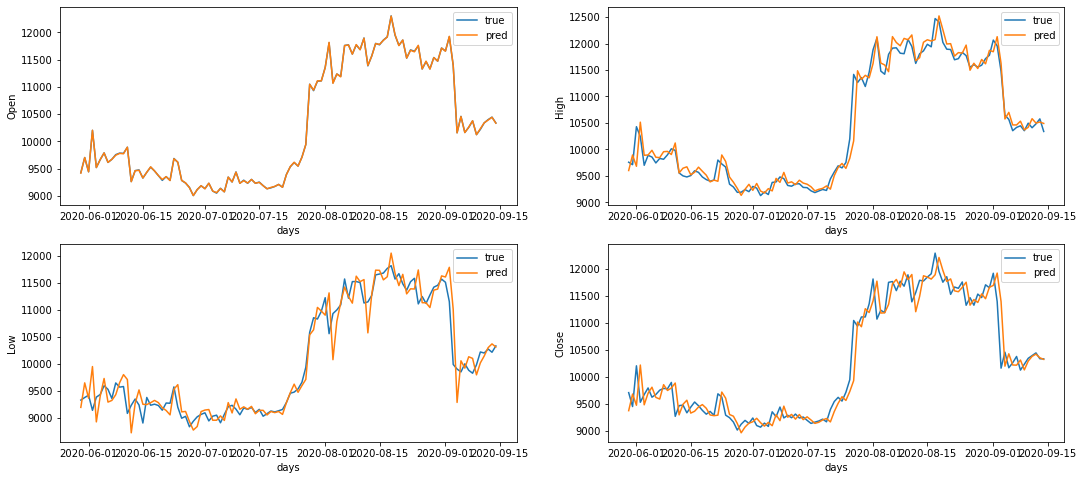

In [95]:
# plots of our predictions and the true values for OHLC with VAR model
fig = plt.figure(figsize=(18, 8))
for i, col_test, col_pred in zip(range(1, 5), OHLC_VAR_results[0], OHLC_VAR_results[1]):
    a = fig.add_subplot(2, 2, i)
    plt.plot(OHLC_VAR_results[0][col_test])
    plt.plot(OHLC_VAR_results[1].iloc[:, col_pred])
    plt.legend(['true', 'pred'])
    plt.xlabel('days')
    plt.ylabel(col_test)

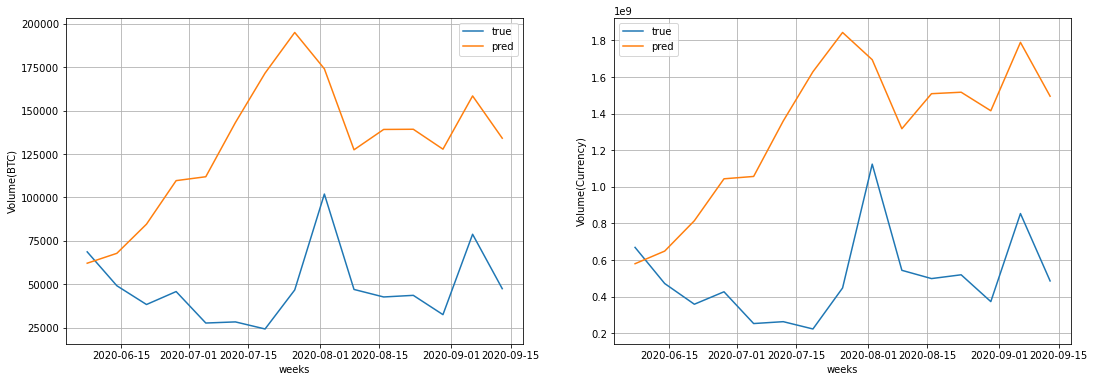

In [96]:
# plots of our predictions and the true values for BTC_CUR with VAR model
fig = plt.figure(figsize=(18, 6))
for i, col_test, col_pred in zip(range(1, 3), BTC_CUR_test, BTC_CUR_pred):
    a = fig.add_subplot(1, 2, i)
    plt.xlabel('weeks')
    plt.ylabel(col_test)
    plt.plot(BTC_CUR_test[col_test].index, BTC_CUR_test[col_test], '-')
    plt.plot(BTC_CUR_pred[col_pred].index, BTC_CUR_pred[col_pred], '-')
    plt.legend(['true', 'pred'])
    plt.grid()

### we see that VAR model performed pretty poorly on BTC/CUR

## LSTM

In [97]:
# importing useful libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler_OHLC = MinMaxScaler(feature_range=(-1, 1))

# scaling the OHLC_df
scaled_OHLC = scaler_OHLC.fit_transform(np.array(daily_OHLC))
# making it a pandas Series
scaled_OHLC_df = pd.DataFrame(scaled_OHLC, index=daily_OHLC.index, columns=daily_OHLC.columns)

In [99]:
scaled_OHLC_df.head()

,Open,High,Low,Close
Timestamp,,,,
2011-12-31,-0.999983,-0.999980,-0.999687,-0.999964
2012-01-01,-0.999964,-0.999937,-0.999666,-0.999920
2012-01-02,-0.999920,-0.999937,-0.999621,-0.999920
2012-01-03,-0.999920,-0.999904,-0.999621,-0.999889
2012-01-04,-0.999889,-0.999879,-0.999628,-0.999860


In [100]:
n_lags_daily = 3 # initializing the number of lags to use (after much trials, 3 was the best to use)
start_walk_daily_lstm = start_walk_daily = daily_df_imputed.index[-108-n_lags_daily]

In [101]:
# spliiting the data
scaled_OHLC_train, scaled_OHLC_test = ts_train_test_split(scaled_OHLC_df, start_walk_daily_lstm)

In [102]:
scaled_OHLC_train.head()

,Open,High,Low,Close
Timestamp,,,,
2011-12-31,-0.999983,-0.999980,-0.999687,-0.999964
2012-01-01,-0.999964,-0.999937,-0.999666,-0.999920
2012-01-02,-0.999920,-0.999937,-0.999621,-0.999920
2012-01-03,-0.999920,-0.999904,-0.999621,-0.999889
2012-01-04,-0.999889,-0.999879,-0.999628,-0.999860


In [103]:
# creating a function to create features from lags of multivariate time series
def create_features_from_time_series(df, n_lags):
    if isinstance(df, np.ndarray):
        df_values = df
    else:
        df_values = np.array(df)
        
    X, y = [], []
    
    for i in range(df.shape[0] - n_lags):
        X.append(df_values[i: i+n_lags])
        y.append(df_values[i+n_lags])
        
    X = np.array(X)
    
    return X.reshape(X.shape[0], X.shape[1], X.shape[2]), np.array(y)

In [104]:
X_train_OHLC, y_train_OHLC = create_features_from_time_series(scaled_OHLC_train, n_lags=n_lags_daily)
X_test_OHLC, y_test_OHLC = create_features_from_time_series(scaled_OHLC_test, n_lags=n_lags_daily)

In [105]:
# creating a function to build a LSTM model
def build_LSTM(shape):
    model = Sequential()
    
    model.add(LSTM(units=50, input_shape=(shape[0], shape[1])))
    
    model.add(Dense(units = shape[1]))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

In [106]:
model_OHLC = build_LSTM([X_train_OHLC.shape[1], X_train_OHLC.shape[2]]) # build LSTM model
# fits the model
history_OHLC = model_OHLC.fit(X_train_OHLC, y_train_OHLC, epochs=15, batch_size=32, shuffle=False)

Epoch 1/15
96/96 [==============================] - 0s 3ms/step - loss: 0.1480
Epoch 2/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 3/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 4/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 5/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 6/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 7/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 8/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 9/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 10/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 11/15
96/96 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 12/15
96/96 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 13/15
96/96 [==============================

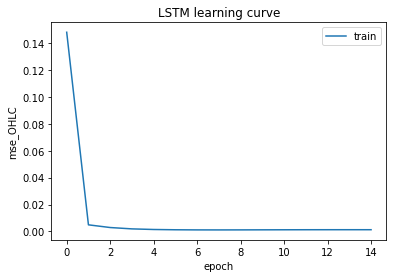

In [107]:
plt.plot(history_OHLC.history['loss'])
plt.title('LSTM learning curve')
plt.xlabel('epoch')
plt.ylabel('mse_OHLC')
plt.legend(['train'])
plt.show()

In [108]:
train_OHLC_forecast = model_OHLC.predict(X_train_OHLC) # forcasts the training set
y_pred_train_OHLC = scaler_OHLC.inverse_transform(train_OHLC_forecast) # inverse transform from MinMaxscaler to 
                                                # get the values of the forecasts back in its original scale

test_OHLC_forecast = model_OHLC.predict(X_test_OHLC) # forcasts the testing set
y_pred_test_OHLC = scaler_OHLC.inverse_transform(test_OHLC_forecast) # inverse transform from MinMaxscaler to 
                                                    # get the values of the forecasts back in its original scale

In [109]:
y_pred_train_OHLC_df = pd.DataFrame(y_pred_train_OHLC, index=scaled_OHLC_train.index[n_lags_daily:], \
                                 columns=scaled_OHLC_train.columns) # converts y_pred_train_OHLC to a dataframe

y_pred_test_OHLC_df = pd.DataFrame(y_pred_test_OHLC, index=scaled_OHLC_test.index[n_lags_daily:], \
                                 columns=scaled_OHLC_test.columns) # converts y_pred_test_OHLC to a dataframe

In [110]:
daily_OHLC_train, daily_OHLC_test = ts_train_test_split(daily_OHLC, start_walk_daily_lstm) # splits daily_OHLC 
                                            # to get daily_OHLC_test to use as ytrue for our scoring metrics

In [111]:
# prints the rmse and mape scores
print_rmse_and_mape(daily_OHLC_test.iloc[n_lags_daily:].copy(), y_pred_test_OHLC_df)

RMSE of Open is 230.197
RMSE of High is 366.475
RMSE of Low is 336.097
RMSE of Close is 335.921

MAPE of Open is 1.465%
MAPE of High is 2.679%
MAPE of Low is 2.615%
MAPE of Close is 2.088%


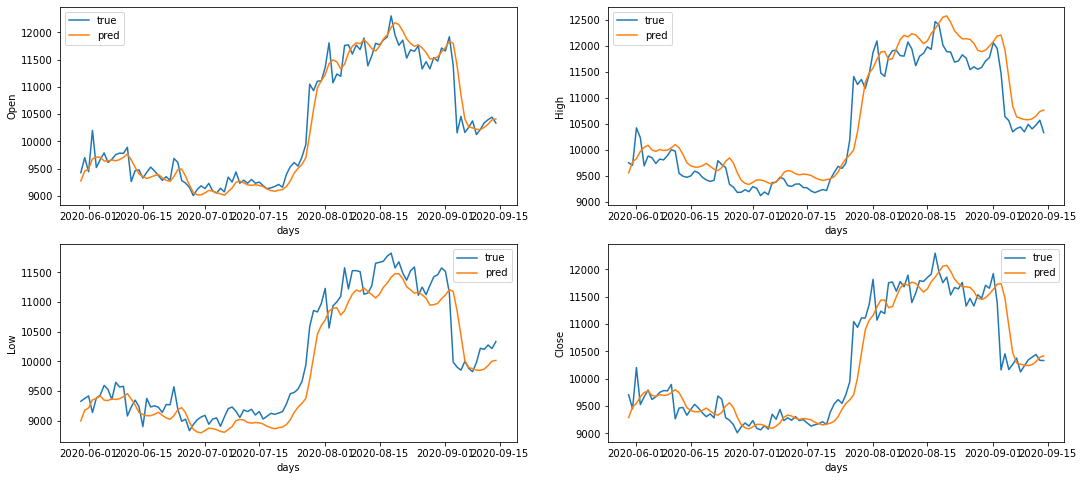

In [112]:
# plots of our predictions and the true values for OHLC for LSTM model
fig = plt.figure(figsize=(18, 8))
for i, col_test, col_pred in zip(range(1, 5), daily_OHLC_test, y_pred_test_OHLC_df):
    a = fig.add_subplot(2, 2, i)
    plt.plot(daily_OHLC_test[col_test].iloc[n_lags_daily:])
    plt.plot(y_pred_test_OHLC_df.loc[:, col_pred])
    plt.legend(['true', 'pred'])
    plt.xlabel('days')
    plt.ylabel(col_test)

### For Weekly BTC and Currency

In [113]:
scaler_BTC_CUR = MinMaxScaler(feature_range=(-1, 1))

# scaling the weekly_btc_cur_df
scaled_BTC_CUR = scaler_BTC_CUR.fit_transform(np.array(weekly_btc_cur_df))
# making it a pandas dataframe
scaled_BTC_CUR_df = pd.DataFrame(scaled_BTC_CUR, index=weekly_btc_cur_df.index, columns=weekly_btc_cur_df.columns)

In [114]:
n_lags_weekly = 5 # initializing the number of lags to use (after much trials, 5 was the best to use)
start_walk_weekly_lstm = weekly_btc_cur_df.index[-15-n_lags_weekly]

In [115]:
# spliiting the data
scaled_BTC_CUR_train, scaled_BTC_CUR_test = ts_train_test_split(scaled_BTC_CUR_df, start_walk_weekly_lstm)

In [116]:
X_train_BTC_CUR, y_train_BTC_CUR = create_features_from_time_series(scaled_BTC_CUR_train, n_lags=n_lags_weekly)
X_test_BTC_CUR, y_test_BTC_CUR = create_features_from_time_series(scaled_BTC_CUR_test, n_lags=n_lags_weekly)

In [117]:
model_BTC_CUR = build_LSTM([X_train_BTC_CUR.shape[1], X_train_BTC_CUR.shape[2]]) # builds a lstm model
# fits the model
history_BTC_CUR = model_BTC_CUR.fit(X_train_BTC_CUR, y_train_BTC_CUR, epochs=15, batch_size=32, shuffle=False)

Epoch 1/15
14/14 [==============================] - 0s 3ms/step - loss: 0.3376
Epoch 2/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0705
Epoch 3/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0579
Epoch 4/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0455
Epoch 5/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 6/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0423
Epoch 7/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0407
Epoch 8/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0394
Epoch 9/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0381
Epoch 10/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 11/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0359
Epoch 12/15
14/14 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 13/15
14/14 [==============================

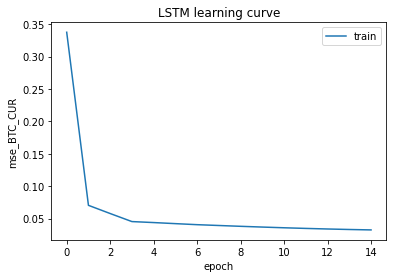

In [118]:
plt.plot(history_BTC_CUR.history['loss'])
plt.title('LSTM learning curve')
plt.xlabel('epoch')
plt.ylabel('mse_BTC_CUR')
plt.legend(['train'])
plt.show()

In [119]:
train_BTC_CUR_forecast = model_BTC_CUR.predict(X_train_BTC_CUR) # forcasts the training set
y_pred_train_BTC_CUR = scaler_BTC_CUR.inverse_transform(train_BTC_CUR_forecast) # inverse transform from 
                                # MinMaxscaler to get the values of the forecasts back in its original scale

test_BTC_CUR_forecast = model_BTC_CUR.predict(X_test_BTC_CUR) # forcasts the testing set
y_pred_test_BTC_CUR = scaler_BTC_CUR.inverse_transform(test_BTC_CUR_forecast) # inverse transform from 
                                # MinMaxscaler to get the values of the forecasts back in its original scale

In [120]:
y_pred_train_BTC_CUR_df = pd.DataFrame(y_pred_train_BTC_CUR, index=scaled_BTC_CUR_train.index[n_lags_weekly:], \
                        columns=scaled_BTC_CUR_train.columns) # converts y_pred_train_BTC_CUR to a dataframe

y_pred_test_BTC_CUR_df = pd.DataFrame(y_pred_test_BTC_CUR, index=scaled_BTC_CUR_test.index[n_lags_weekly:], \
                        columns=scaled_BTC_CUR_test.columns) # converts y_pred_test_BTC_CUR to a dataframe

In [121]:
# splitting weekly_btc_cur_df to get weekly_BTC_CUR_test to use as ytrue for our scoring metrics
weekly_BTC_CUR_train, weekly_BTC_CUR_test = ts_train_test_split(weekly_btc_cur_df, start_walk_weekly_lstm)

In [122]:
# printing out the rmse and mape scores
print_rmse_and_mape(weekly_BTC_CUR_test.iloc[n_lags_weekly:].copy(), y_pred_test_BTC_CUR_df) 

RMSE of Volume(BTC) is 31681.751
RMSE of Volume(Currency) is 263703208.835

MAPE of Volume(BTC) is 70.336%
MAPE of Volume(Currency) is 38.704%


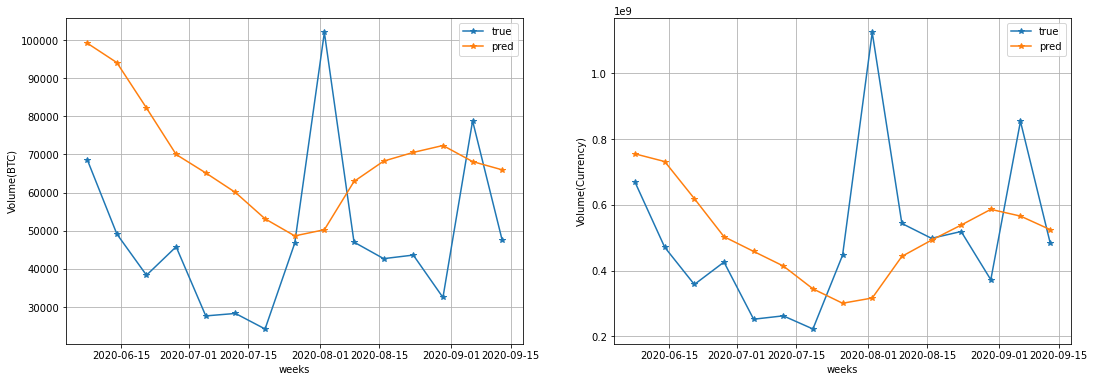

In [123]:
# plot of our predictions and the true values for BTC_CUR for LSTM model
fig = plt.figure(figsize=(18, 6))
for i, col_test, col_pred in zip(range(1, 3), weekly_BTC_CUR_test, y_pred_test_BTC_CUR_df):
    a = fig.add_subplot(1, 2, i)
    plt.xlabel('weeks')
    plt.ylabel(col_test)
    plt.plot(weekly_BTC_CUR_test[col_test].iloc[n_lags_weekly:], '-', marker='*')
    plt.plot(y_pred_test_BTC_CUR_df.loc[:, col_pred], '-', marker='*')
    plt.legend(['true', 'pred'])
    plt.grid()

### We now see that for daily 0HLC, VAR model performs better, while for weekly BTC/CURRENCY, LSTM model performs better. Therefore, we will use VAR for our final OHLC forecasting, while LSTM for our final BTC/CURRENCY forecasting 

## Final Forecast

### Let's train on the whole daily OHLC training set and forecast till 31st December 2020 (108days) first, we create a function to do walk forward with a VAR model 108 steps into the future.

In [124]:
from datetime import timedelta

### Let's do a multi-step recursive forecast where we forecast for the next day and our forecast would then become part of the observations for the next day forecast. This has a drawback as dependencies will be lost and forecast errors will be carried forward. This is a common problem in time series forecasting.

In [125]:
# creating a function for recursive multistep forecasting
def recursive_var_multi_step_forcast(df, lag_order, time_steps=108):
    df_log = np.log(df)
    history = [list(x) for x in np.array(df_log)]
    forecasts = []
    
    for _ in range(time_steps):
        model = VAR(np.array(history))                
        model_fit = model.fit(lag_order)
        yhat = model_fit.forecast(model.y, steps=1)
        forecasts.append(list(yhat[0]))
        history.append(list(yhat[0]))

    future_dates = [df.index[-1] + timedelta(i) for i in range(1, time_steps+1)]

    return pd.DataFrame(np.exp(history), index=list(df.index)+future_dates, columns=df.columns)

In [126]:
OHLC_mutistep_forecast = recursive_var_multi_step_forcast(daily_OHLC, 16) # forecasts

In [127]:
print(OHLC_mutistep_forecast.shape)
OHLC_mutistep_forecast.tail()

(3289, 4)


,Open,High,Low,Close
2020-12-27,10650.274933,10939.020268,10309.273143,10653.988926
2020-12-28,10654.216226,10943.138171,10312.985374,10657.917317
2020-12-29,10658.145054,10947.241256,10316.695440,10661.839938
2020-12-30,10662.068128,10951.335737,10320.400325,10665.752544
2020-12-31,10665.981148,10955.417759,10324.102650,10669.659332


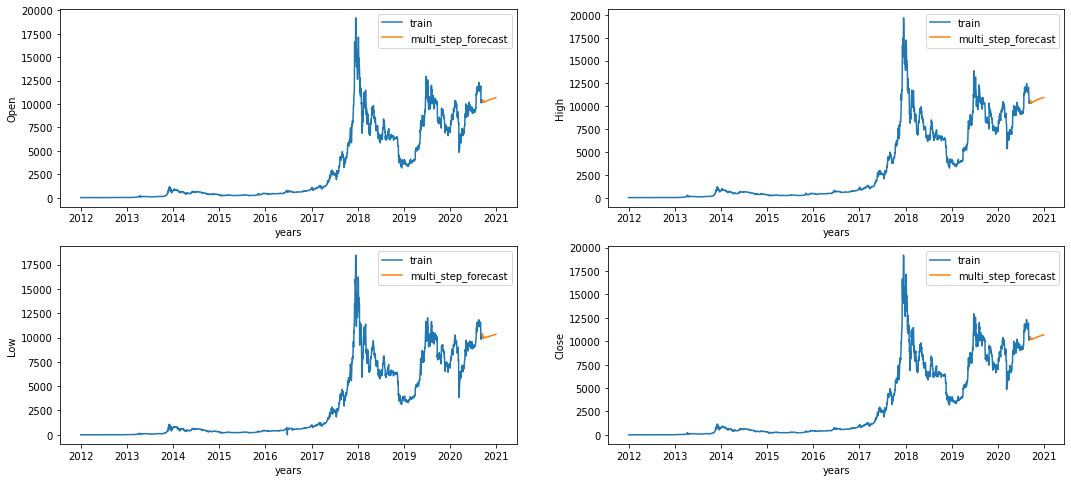

In [128]:
# plot of our train data and final forecasts (out-sample forecasts) for OHLC
fig = plt.figure(figsize=(18, 8))
for ind, series in zip(range(1, OHLC_mutistep_forecast.shape[1]+1), list(OHLC_mutistep_forecast.columns)):
    a = fig.add_subplot(2, 2, ind)
    plt.plot(daily_OHLC[series])
    plt.plot(OHLC_mutistep_forecast[series][-108:])
    plt.legend(['train', 'multi_step_forecast'])
    plt.xlabel('years')
    plt.ylabel(series)

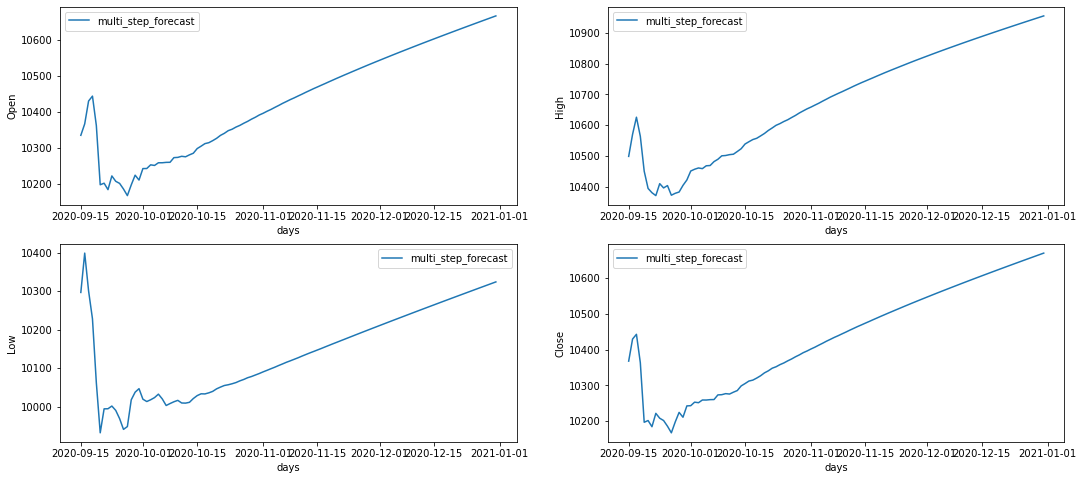

In [129]:
# taking a closer look at the forecasts (out-sample forecasts)
fig = plt.figure(figsize=(18, 8))
for ind, series in zip(range(1, OHLC_mutistep_forecast.shape[1]+1), list(OHLC_mutistep_forecast.columns)):
    a = fig.add_subplot(2, 2, ind)
    plt.plot(OHLC_mutistep_forecast[series][-108:])
    plt.legend(['multi_step_forecast'])
    plt.xlabel('days')
    plt.ylabel(series)

### Let's see a combined plot of Open, High, Low and Close

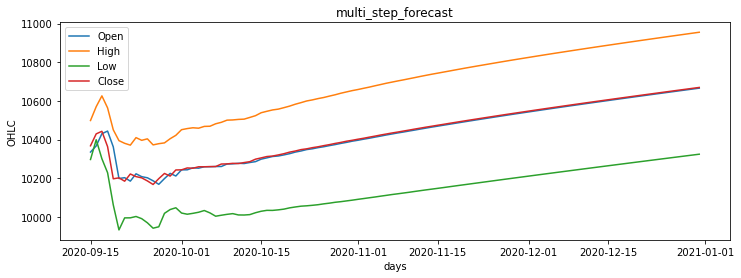

In [130]:
fig = plt.figure(figsize=(12, 4))
plt.xlabel('days')
plt.ylabel('OHLC')
plt.title('multi_step_forecast')
for series in list(OHLC_mutistep_forecast.columns):
    plt.plot(OHLC_mutistep_forecast[series][-108:], label=series)
plt.legend(list(OHLC_mutistep_forecast.columns))
plt.show()

In [131]:
next_day_forecast = OHLC_mutistep_forecast.iloc[-108]
next_day_forecast

Open     10335.252283
High     10498.517177
Low      10296.744775
Close    10367.667423
Name: 2020-09-15 00:00:00, dtype: float64

In [132]:
for series in next_day_forecast.index:
    print('Our forecast of bitcoin {} for the next day 15-09-2020 is {}'.format(series, \
                                                                                next_day_forecast[series]))

Our forecast of bitcoin Open for the next day 15-09-2020 is 10335.252282888148
Our forecast of bitcoin High for the next day 15-09-2020 is 10498.517176715819
Our forecast of bitcoin Low for the next day 15-09-2020 is 10296.744775113051
Our forecast of bitcoin Close for the next day 15-09-2020 is 10367.667422841816


### Let's train on the whole weekly BIT/CUR training set and forecast till 31st December 2020 (15weeks) first, we create a function to do walk forward with a LSTM model 15 steps into the future.

In [133]:
# defining a function to convert at most a 3d array to a list of lists
def array_to_list_of_lists(arr):
    if len(arr.shape) == 3:
        return [[list(j) for j in i] for i in arr]
    return [list(i) for i in arr]

In [134]:
# defining a recursive multi step forcast function for a lstm model
def recursive_lstm_multi_step_forcast(df, n_lags=n_lags_weekly, timesteps=15):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_df = scaler.fit_transform(np.array(df))
    
    X, y = create_features_from_time_series(scaled_df, n_lags)
    model = build_LSTM([X.shape[1], X.shape[2]])
    forecasts = []
    
    for t in range(timesteps):
        model.fit(X, y, epochs=15, batch_size=32, shuffle=False, verbose=0)
        X_test = np.array(array_to_list_of_lists(X[-1][-n_lags+1:]) + array_to_list_of_lists(y[-1].reshape(\
                                                                                                        1, -1)))
        X_test = X_test.reshape(1, X_test.shape[0], X_test.shape[1])
        y_pred = model.predict(X_test)
        forecasts.append(list(y_pred[0]))
        X = np.array(array_to_list_of_lists(X) + array_to_list_of_lists(X_test))
        y = np.array(array_to_list_of_lists(y) + array_to_list_of_lists(y_pred))
        
        if t>0 and t%3 == 0:
            print('Done {} of {} timesteps'.format(t, timesteps))
    
    print('Finished {} of {} timesteps!'.format(timesteps, timesteps))
    
    forecasts = scaler.inverse_transform(np.array(forecasts))
    future_dates = [df.index[-1] + timedelta(i) for i in range(7, (timesteps*7)+1, 7)]
    
    return pd.DataFrame(forecasts, index=future_dates, columns=df.columns)

In [135]:
BTC_CUR_mutistep_forecast = recursive_lstm_multi_step_forcast(weekly_btc_cur_df, n_lags_weekly) # forecasts

Done 3 of 15 timesteps
Done 6 of 15 timesteps
Done 9 of 15 timesteps
Done 12 of 15 timesteps
Finished 15 of 15 timesteps!


In [136]:
print(BTC_CUR_mutistep_forecast.shape)
BTC_CUR_mutistep_forecast.tail()

(15, 2)


,Volume(BTC),Volume(Currency)
2020-11-29,56222.246094,686236672.0
2020-12-06,56340.195312,696284608.0
2020-12-13,56528.515625,705467392.0
2020-12-20,56909.816406,714336384.0
2020-12-27,61482.742188,743302976.0


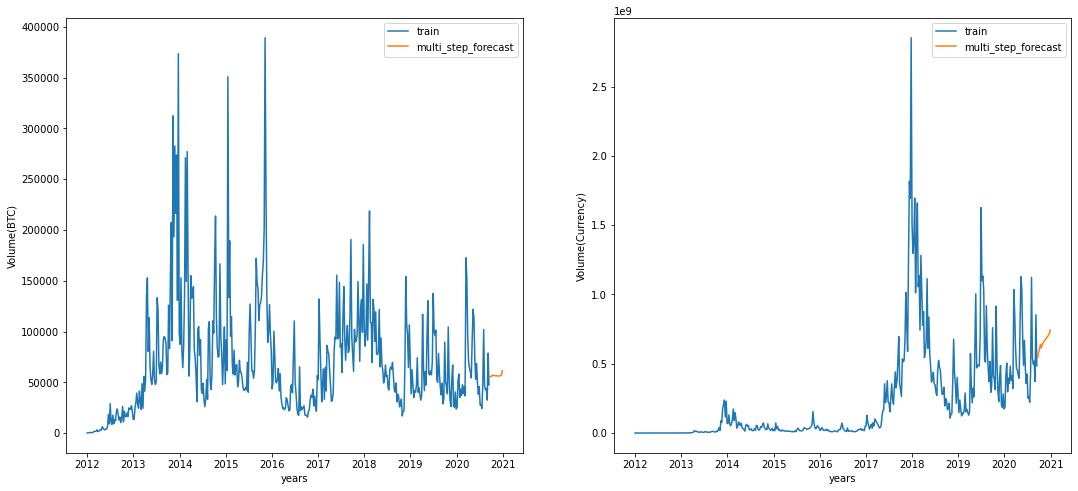

In [137]:
# plot of our train dataset and the forecasts (out-sample forecasts) for BTC_CUR
fig = plt.figure(figsize=(18, 8))
for ind, series in zip(range(1, BTC_CUR_mutistep_forecast.shape[1]+1), list(BTC_CUR_mutistep_forecast.columns)):
    a = fig.add_subplot(1, 2, ind)
    plt.plot(weekly_btc_cur_df[series])
    plt.plot(BTC_CUR_mutistep_forecast[series])
    plt.legend(['train', 'multi_step_forecast'])
    plt.xlabel('years')
    plt.ylabel(series)

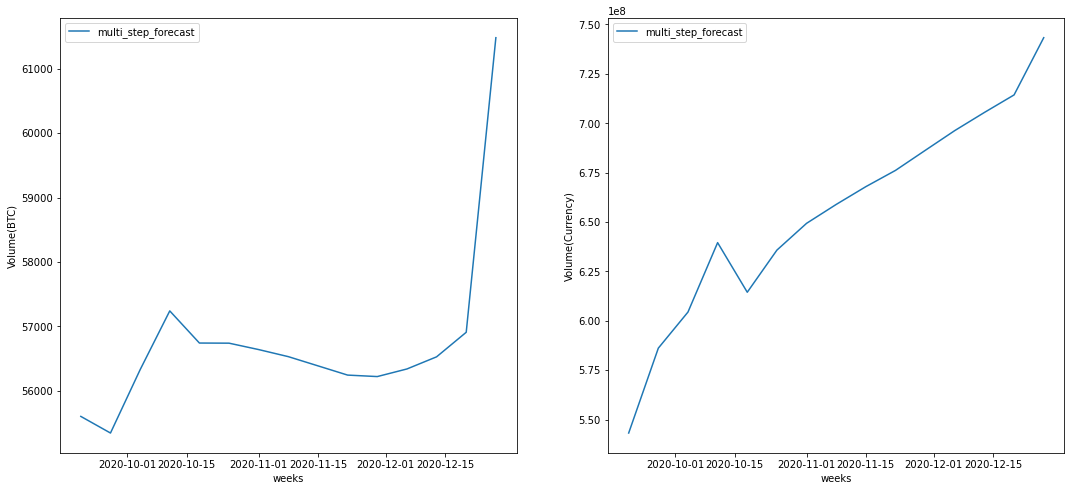

In [138]:
# taking a closer look at the forecasts (out-sample forecasts) of BTC and Currency Volumes
fig = plt.figure(figsize=(18, 8))
for ind, series in zip(range(1, BTC_CUR_mutistep_forecast.shape[1]+1), list(BTC_CUR_mutistep_forecast.columns)):
    a = fig.add_subplot(1, 2, ind)
    plt.plot(BTC_CUR_mutistep_forecast[series])
    plt.legend(['multi_step_forecast'])
    plt.xlabel('weeks')
    plt.ylabel(series)

In [139]:
next_week_forecast = BTC_CUR_mutistep_forecast.iloc[0] # gets our forecast for the next week
next_week_forecast

Volume(BTC)         5.560382e+04
Volume(Currency)    5.431933e+08
Name: 2020-09-20 00:00:00, dtype: float32

In [140]:
for series in next_week_forecast.index:
    print('Our forecast of bitcoin {} for the next week ending 20-09-2020 is {}'.format(series, \
                                                                                next_week_forecast[series]))

Our forecast of bitcoin Volume(BTC) for the next week ending 20-09-2020 is 55603.82421875
Our forecast of bitcoin Volume(Currency) for the next week ending 20-09-2020 is 543193344.0


In [141]:
# saving our OHLC and BTC_CURRENCY forecasts as a csv file
OHLC_mutistep_forecast_df = OHLC_mutistep_forecast.iloc[-108].copy()
OHLC_mutistep_forecast_df.to_csv('OHLC_mutistep_forecasts.csv')

BTC_CUR_mutistep_forecast_df = BTC_CUR_mutistep_forecast.copy()
BTC_CUR_mutistep_forecast_df.to_csv('BTC_CUR_mutistep_forecast.csv')

# Thank you.